In [1]:
# import important libraries

%matplotlib inline
import sys
import numpy as np
import pandas as pd
from math import exp
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

In [2]:

from utility_fncs import load_dataset
%matplotlib widget

DataFrame 'adv_df' for 'Advertising.csv' has been created in the data_loader module.
DataFrame 'credit_df' for 'credit.csv' has been created in the data_loader module.
DataFrame 'poly_df' for 'poly.csv' has been created in the data_loader module.
DataFrame 'collinear_df' for 'colinearity.csv' has been created in the data_loader module.
DataFrame 'dataset_df' for 'dataset.csv' has been created in the data_loader module.
DataFrame 'noisypopulation_df' for 'noisypopulation.csv' has been created in the data_loader module.
DataFrame 'polynomial50_df' for 'polynomial50.csv' has been created in the data_loader module.
DataFrame 'insurance_claim_df' for 'insurance_claim.csv' has been created in the data_loader module.


In [3]:
# Make a dataframe of the file "insurance_claim.csv"

df = load_dataset.insurance_claim_df

In [4]:
# Take a quick look of the data, notice that the response variable is binary

df.head()

,age,insuranceclaim
0,18.437371,0
1,19.539508,0
2,19.921685,0
3,20.625442,0
4,21.139852,0


In [5]:
# Assign age as the predictor variable 
x = df["age"].values

# Assign insuranceclaim as the response variable
y = df["insuranceclaim"].values


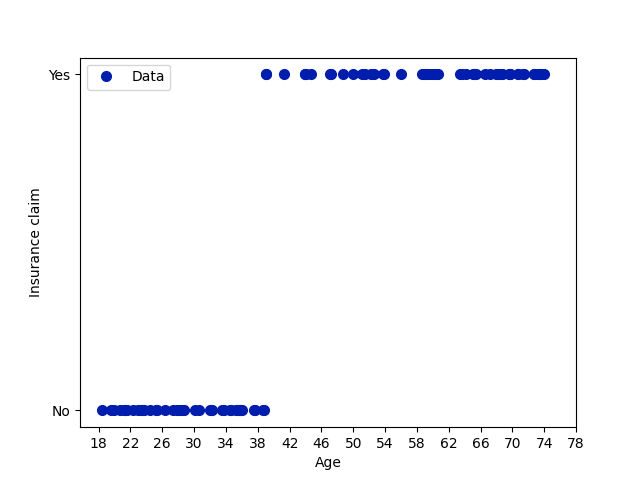

In [6]:
# Make a plot of the response (insuranceclaim) vs the predictor (age)
plt.plot(x,y,'o', markersize=7,color="#011DAD",label="Data")

# Add the labels for the axes
plt.xlabel("Age")
plt.ylabel("Insurance claim")

plt.xticks(np.arange(18, 80, 4.0))

# Label the value 1 as 'Yes' & 0 as 'No'
plt.yticks((0,1), labels=('No', 'Yes'))
plt.legend(loc='best')
plt.show()

Guesstimate the values of $\beta_0$ & $\beta_1$

Refer to the logistic regression slides for information of how they affect the shape of the logistic (sigmoid) curve. 

*Hint: It may help to focus on the age value that looks like the point of change in the plot. The logistic regression formula should result in a 0.5 probability with your guesstimated betas for that age value in order to achieve a good accuracy.*


In [7]:
### edTest(test_beta_guesstimate) ###
#-(beta0 + beta1*x)=0 
# at x=around 40, y=0
# So, beta0 + beta1*40=0
# beta0 = -40*beta1
# Let's take beta1=0.9 as the curve is very steep at 40
beta1 = 0.9
beta0 = -38.5*beta1



Define the logistic function below and use it to predict the probability of a positive response value given each value of `age` in the dataset.

Store these predicted probabilities in the variable `probas` which can be a list or array. You can do this through looping or take advantage of vector operations.

Note: It is acceptable for this exercise to access the external `beta0` & `beta1` variables in your `logistic` function.

Hint: `np.exp()` may be useful here.

In [8]:
### edTest(test_beta_computation) ###
def logistic(x):
    return 1/(1+np.exp(-(beta0 + beta1*x)))

# P(y=1|x_i) for each x_i in x
probas = logistic(x)
probas

array([1.43952647e-08, 3.88156300e-08, 5.47502878e-08, 1.03147877e-07,
       1.63879714e-07, 1.95175594e-07, 1.99328477e-07, 2.37924910e-07,
       4.65835932e-07, 8.47101056e-07, 1.15537528e-06, 1.16802203e-06,
       1.51375937e-06, 1.64985064e-06, 3.12610247e-06, 6.36579602e-06,
       7.19295421e-06, 1.73472514e-05, 4.41471272e-05, 6.98485548e-05,
       7.95832664e-05, 1.01527606e-04, 1.05278629e-04, 1.38543816e-04,
       1.47701529e-04, 5.47609074e-04, 8.56250702e-04, 2.78672145e-03,
       3.10061712e-03, 3.62013266e-03, 1.12711195e-02, 1.35820044e-02,
       2.78700075e-02, 3.02748846e-02, 5.41499678e-02, 5.46462125e-02,
       6.13289509e-02, 7.57325257e-02, 7.76028399e-02, 7.94313382e-02,
       9.87107250e-02, 2.91074294e-01, 3.08831092e-01, 5.35220954e-01,
       5.59652253e-01, 6.11918209e-01, 6.28594514e-01, 9.22568589e-01,
       9.92155434e-01, 9.92397708e-01, 9.93599305e-01, 9.96350096e-01,
       9.99542594e-01, 9.99599098e-01, 9.99901212e-01, 9.99967808e-01,
      

**Convert the probabilities to classifications**

If the predictions are above a threshold of 0.5, predict 1, otherwise predict 0. Store the predicted class labels in `y_pred`


In [9]:
# Get classification predictions

y_pred = (probas >= 0.5).astype(int)

**Calculate Accuracy**

See if you can get an accuracy above 90%

In [10]:
### edTest(test_acc) ###
# Use accuracy_score function to find the accuracy 

accuracy = accuracy_score(y, y_pred)

# Print the accuracy
print(accuracy)

0.98


Complete the plot by providing the correct data (see label arguments for guidance).

This plot will help you adjust your betas for better accuracy.

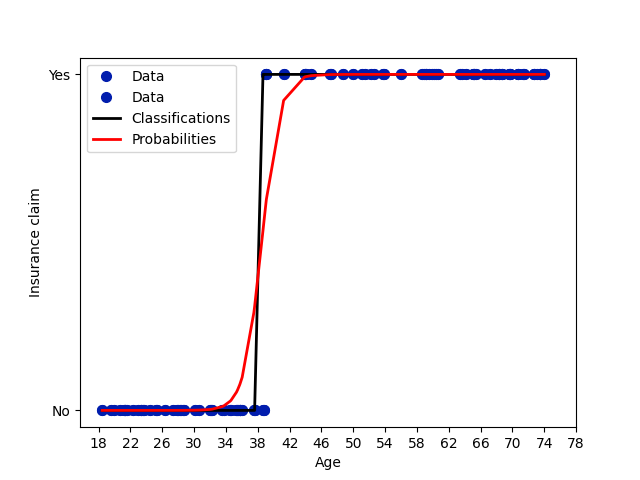

In [11]:
# Make a plot similar to the one above along with the fit curve
plt.plot(x, y,'o', markersize=7,color="#011DAD",label="Data")

plt.plot(x,y_pred,linewidth=2,color='black',label="Classifications")
plt.plot(x,probas,linewidth=2,color='red',label="Probabilities")

plt.xticks(np.arange(18, 80, 4.0))
plt.xlabel("Age")
plt.ylabel("Insurance claim")
plt.yticks((0,1), labels=('No', 'Yes'))
plt.legend()
plt.show()

## ⏸ Post exercise question:

In this exercise, you may have had to stumble around to find the right values of $\beta_0$ and $\beta_1$ to get accurate results.

Although you may have used visual inspection to find a good fit, in most problems you would need a quantative method to measure the performance of your model. (*Loss function*)

Which of the following below are **NOT** possible ways of quantifying the performance of the model.

- A. Compute the mean squared error loss of the predicted labels.
- B. Evaluate the log-likelihood for this Bernoulli response variable.
- C. Go the the temple of Apollo at Delphi, and ask the high priestess Pythia
- D. Compute the total number of misclassified labels.

In [ ]:
### edTest(test_quiz) ###

# Put down your answers in a string format below (using quotes)

# for. eg, if you think the options are 'A' & 'B', input below as "A,B"

answer = ___